In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 15, 6

In [17]:
# Load dataset and identify data types

data=pd.read_csv('occupancy_data.csv')
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

       datetime    location count_operation  count_change  count_total
0  3/18/17 8:59  Georgetown               +             1            1
1  3/18/17 8:59  Georgetown               +             1            2
2  3/18/17 8:59  Georgetown               +             1            3
3  3/18/17 8:59  Georgetown               +             1            4
4  3/18/17 8:59  Georgetown               +             1            5

 Data Types:
datetime           object
location           object
count_operation    object
count_change        int64
count_total         int64
dtype: object


In [18]:
# Read the data as a timeseries

dateparse = lambda dates: pd.datetime.strptime(dates, ("%Y-%m-%d %h-%m-%s "))
data=pd.read_csv('occupancy_data.csv', parse_dates=True, index_col="datetime")
print(data.head())


                       location count_operation  count_change  count_total
datetime                                                                  
2017-03-18 08:59:00  Georgetown               +             1            1
2017-03-18 08:59:00  Georgetown               +             1            2
2017-03-18 08:59:00  Georgetown               +             1            3
2017-03-18 08:59:00  Georgetown               +             1            4
2017-03-18 08:59:00  Georgetown               +             1            5


In [19]:
# Cross-check the datatype

data.index

DatetimeIndex(['2017-03-18 08:59:00', '2017-03-18 08:59:00',
               '2017-03-18 08:59:00', '2017-03-18 08:59:00',
               '2017-03-18 08:59:00', '2017-03-18 08:59:00',
               '2017-03-18 08:59:00', '2017-03-18 08:59:00',
               '2017-03-18 08:59:00', '2017-03-18 08:59:00',
               ...
               '2017-04-08 16:14:00', '2017-04-08 16:14:00',
               '2017-04-08 16:15:00', '2017-04-08 16:15:00',
               '2017-04-08 16:15:00', '2017-04-08 16:19:00',
               '2017-04-08 16:26:00', '2017-04-08 16:26:00',
               '2017-04-08 16:27:00', '2017-04-08 16:28:00'],
              dtype='datetime64[ns]', name='datetime', length=818, freq=None)

In [20]:
# Convert the column into a series object

ts=data['count_total']
ts.head(10)

datetime
2017-03-18 08:59:00     1
2017-03-18 08:59:00     2
2017-03-18 08:59:00     3
2017-03-18 08:59:00     4
2017-03-18 08:59:00     5
2017-03-18 08:59:00     6
2017-03-18 08:59:00     7
2017-03-18 08:59:00     8
2017-03-18 08:59:00     9
2017-03-18 08:59:00    10
Name: count_total, dtype: int64

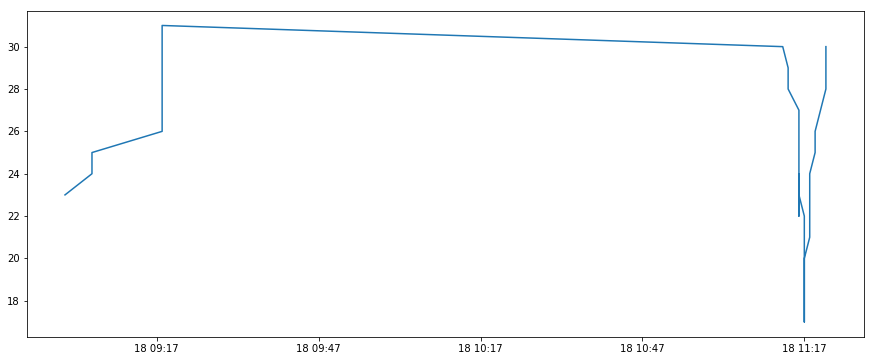

In [21]:
# Plot occupancy for March 18th from 9AM to 12PM (before the lunch break)

plt.plot(ts['2017-03-18 09:00:00':'2017-03-18 12:00:00'])


In [22]:
# Stationarity Check for March 18th 9AM to 12PM

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determining Rolling Statistics
    
    rolmean = ts['2017-03-18 09:00:00':'2017-03-18 12:00:00'].rolling(window=12,center=False).mean()
    rolstd = ts['2017-03-18 09:00:00':'2017-03-18 12:00:00'].rolling(window=12,center=False).std()
    
    #Plotting Rolling Statistics
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std =plt.plot(rolstd, color='black', label ='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    # Dickey-Fuller Test
    
    print ('Results for Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
        print (dfoutput)

        

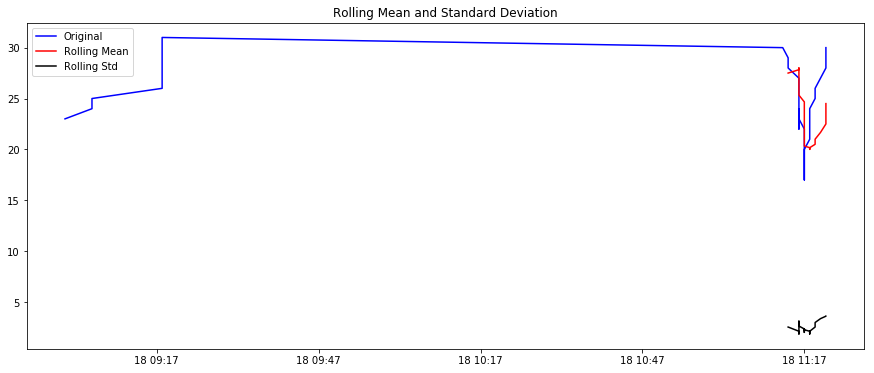

Results for Dickey-Fuller Test:
Test Statistic                 -1.894794
p-value                         0.334514
#Lags Used                      1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
dtype: float64
Test Statistic                 -1.894794
p-value                         0.334514
#Lags Used                      1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
dtype: float64
Test Statistic                 -1.894794
p-value                         0.334514
#Lags Used                      1.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [23]:
# Run the Test

test_stationarity(ts['2017-03-18 09:00:00':'2017-03-18 12:00:00'])

In [24]:
# p-value >0.05 means that the data has a unit root and is non-stationaty

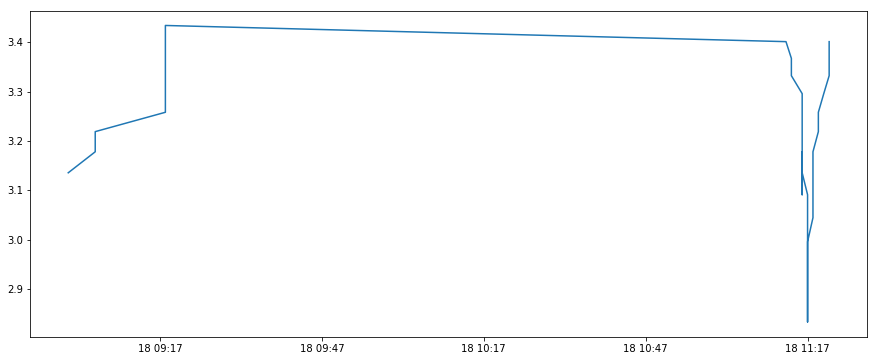

In [25]:
# Use log transformation to see the trend more clearly. 

ts_log = np.log(ts['2017-03-18 09:00:00':'2017-03-18 12:00:00'])
plt.plot(ts_log)


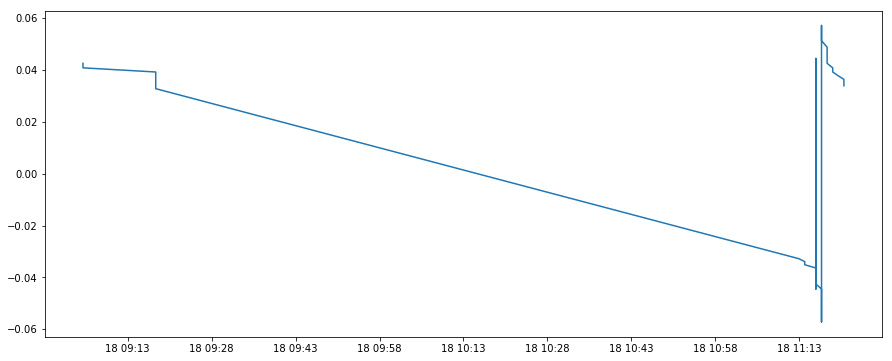

In [26]:
# Eliminate ternd by differencing. Difference between an observation in a particular insatant and an observarion in a previous instant

ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

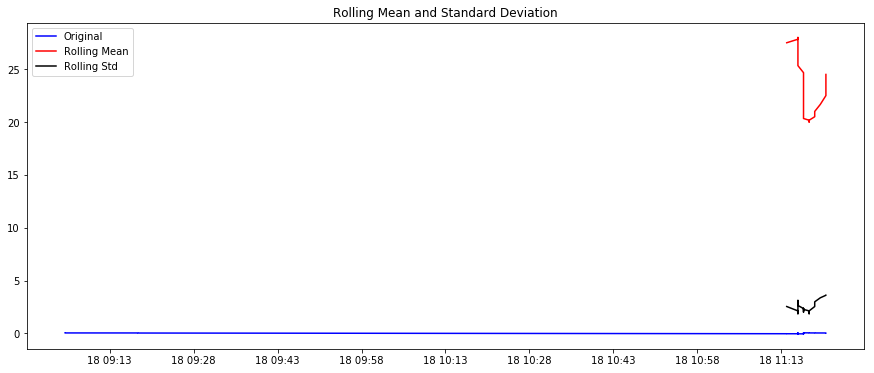

Results for Dickey-Fuller Test:
Test Statistic                 -2.253530
p-value                         0.187394
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
dtype: float64
Test Statistic                 -2.253530
p-value                         0.187394
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
dtype: float64
Test Statistic                 -2.253530
p-value                         0.187394
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


In [15]:
# Test to see if the trend reduced 

ts_log_diff.dropna(inplace = True)
test_stationarity(ts_log_diff)